In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
dup=df['animal name'].value_counts()
dup[dup>1]

frog    2
Name: animal name, dtype: int64

In [8]:
frog=df[df['animal name']=='frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# value in venomous column is different
# these are two different frogs
# we will change the name of one as ' frog2'

In [17]:
df[(df['animal name']=='frog') & (df['venomous']==1) ]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [29]:
df['animal name'][(df['animal name']=='frog') & (df['venomous']==1)]='frog2'

In [30]:
df.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [31]:
df['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

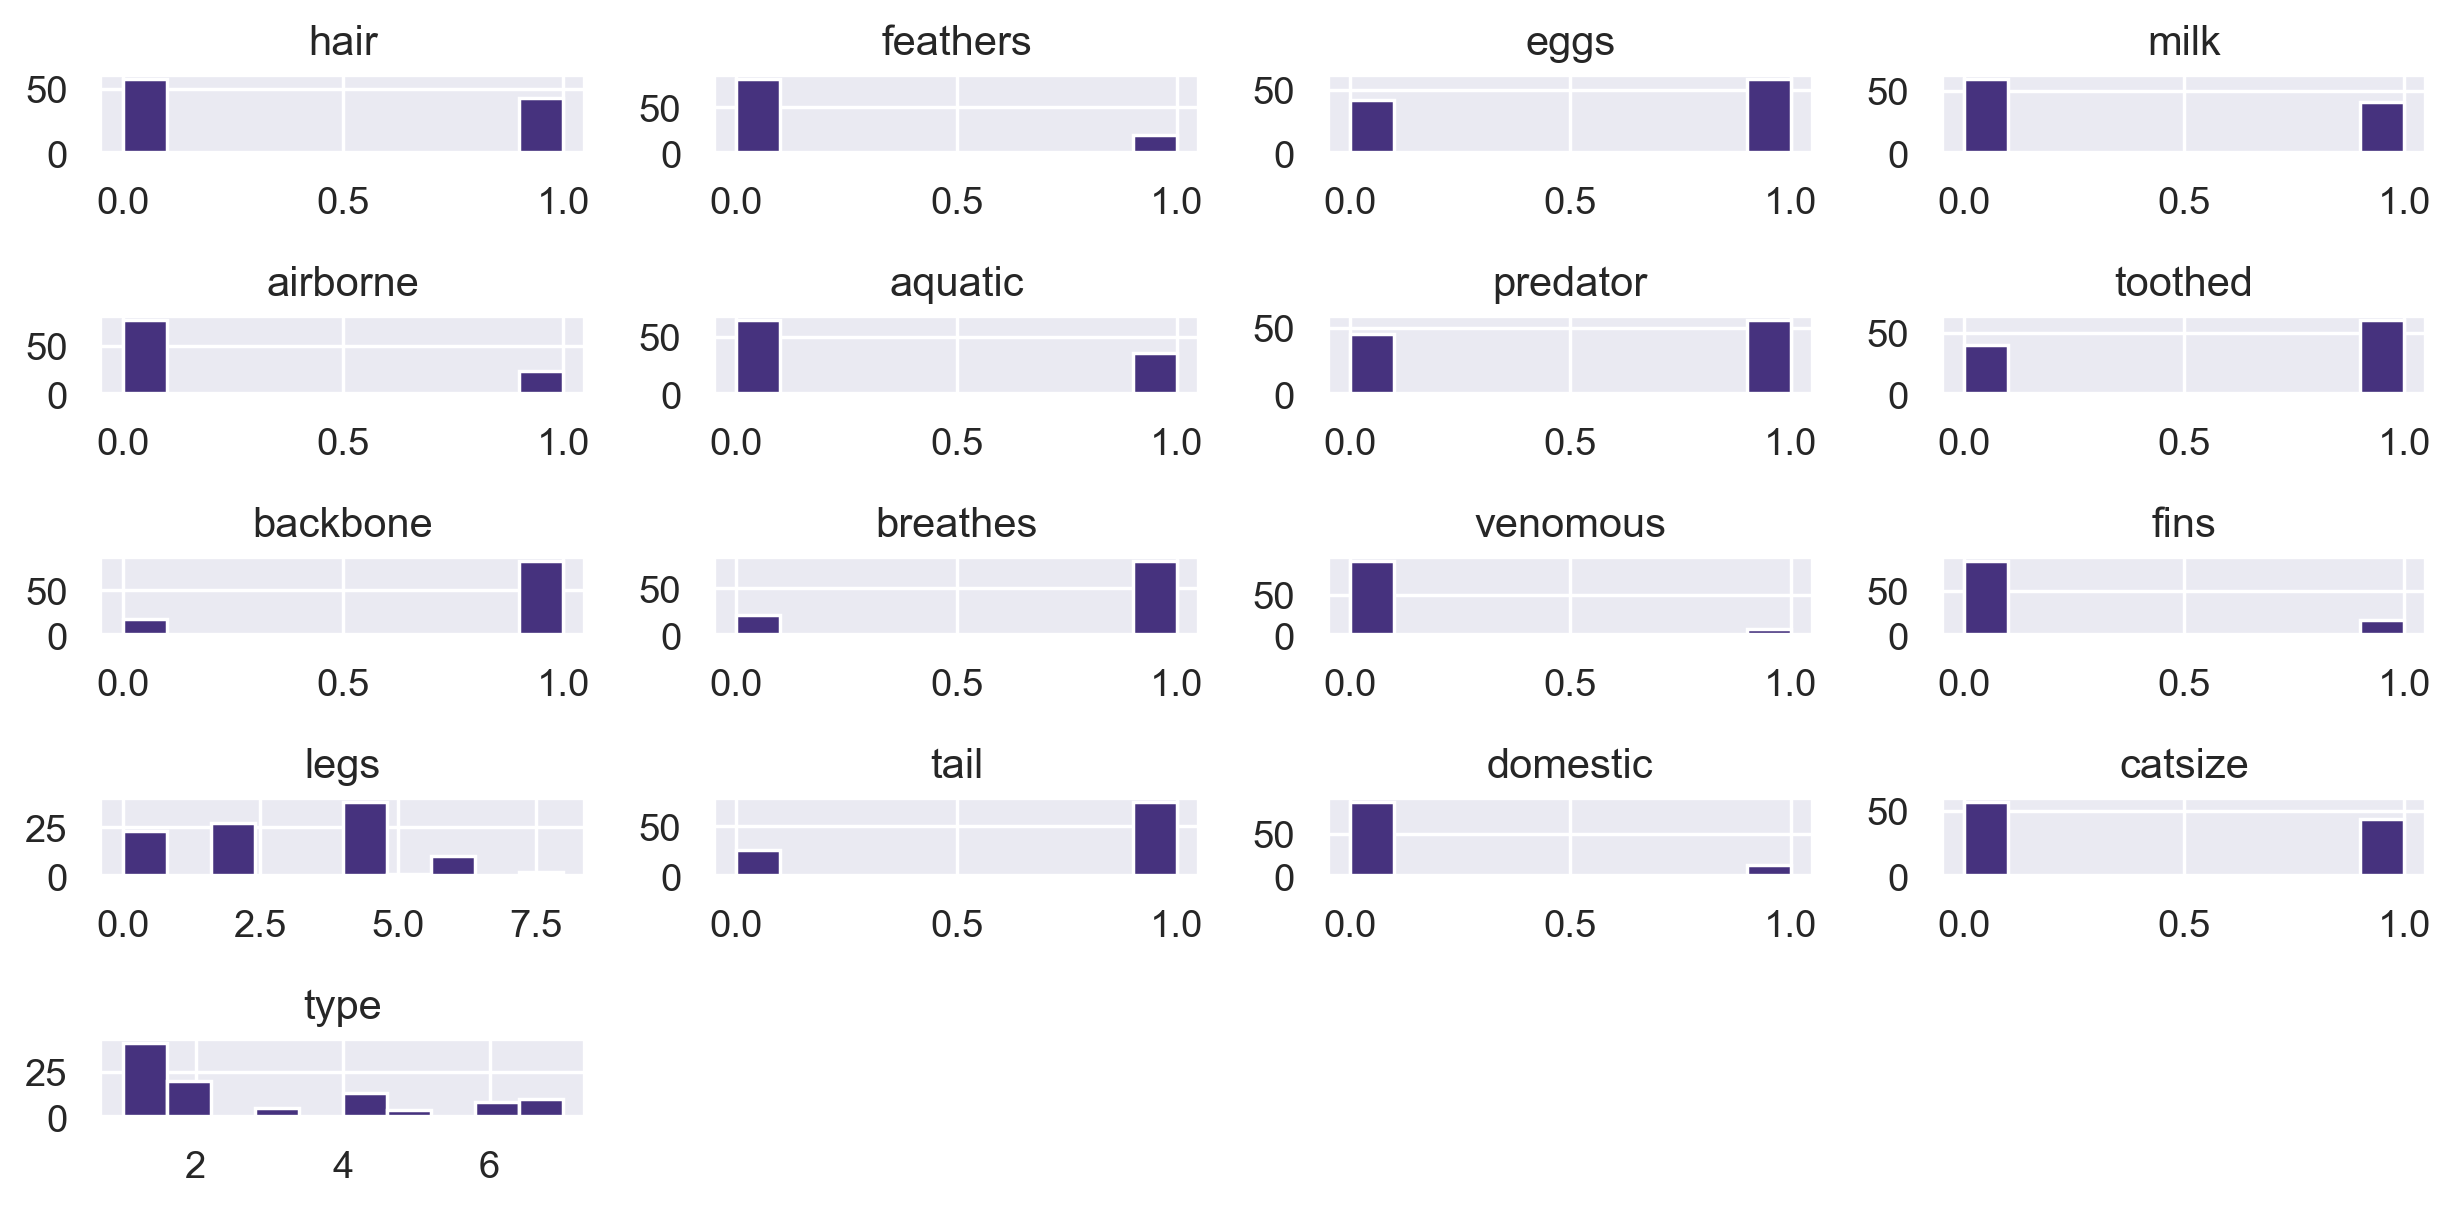

In [34]:
df.hist()
plt.tight_layout()

# Feature Scalling

In [35]:
x=df.iloc[:,1:16]
y=df.iloc[:,-1]

In [36]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [37]:
x

array([[ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
        -1.69841555, -0.38435306],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
         0.58878406, -0.38435306],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.40443503,
         0.58878406, -0.38435306],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
         0.58878406, -0.38435306],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.40443503,
        -1.69841555, -0.38435306],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.41594766,
         0.58878406, -0.38435306]])

# Train test split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [39]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2],
      dtype=int64)

In [40]:
knn.score(xtrain,ytrain) , knn.score(xtest,ytest)

(0.975, 0.9047619047619048)

# Hyperparameter Tunning of knn


In [41]:
train_acc=[]
test_acc=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [42]:
train_acc,test_acc

([1.0,
  0.9375,
  0.975,
  0.95,
  0.9375,
  0.9375,
  0.9125,
  0.9125,
  0.9,
  0.9,
  0.9,
  0.8625,
  0.8625,
  0.8625,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.8875,
  0.8875,
  0.8875,
  0.85,
  0.85],
 [0.9523809523809523,
  0.8571428571428571,
  0.9047619047619048,
  0.9047619047619048,
  0.9047619047619048,
  0.9047619047619048,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8095238095238095,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571,
  0.8571428571428571])

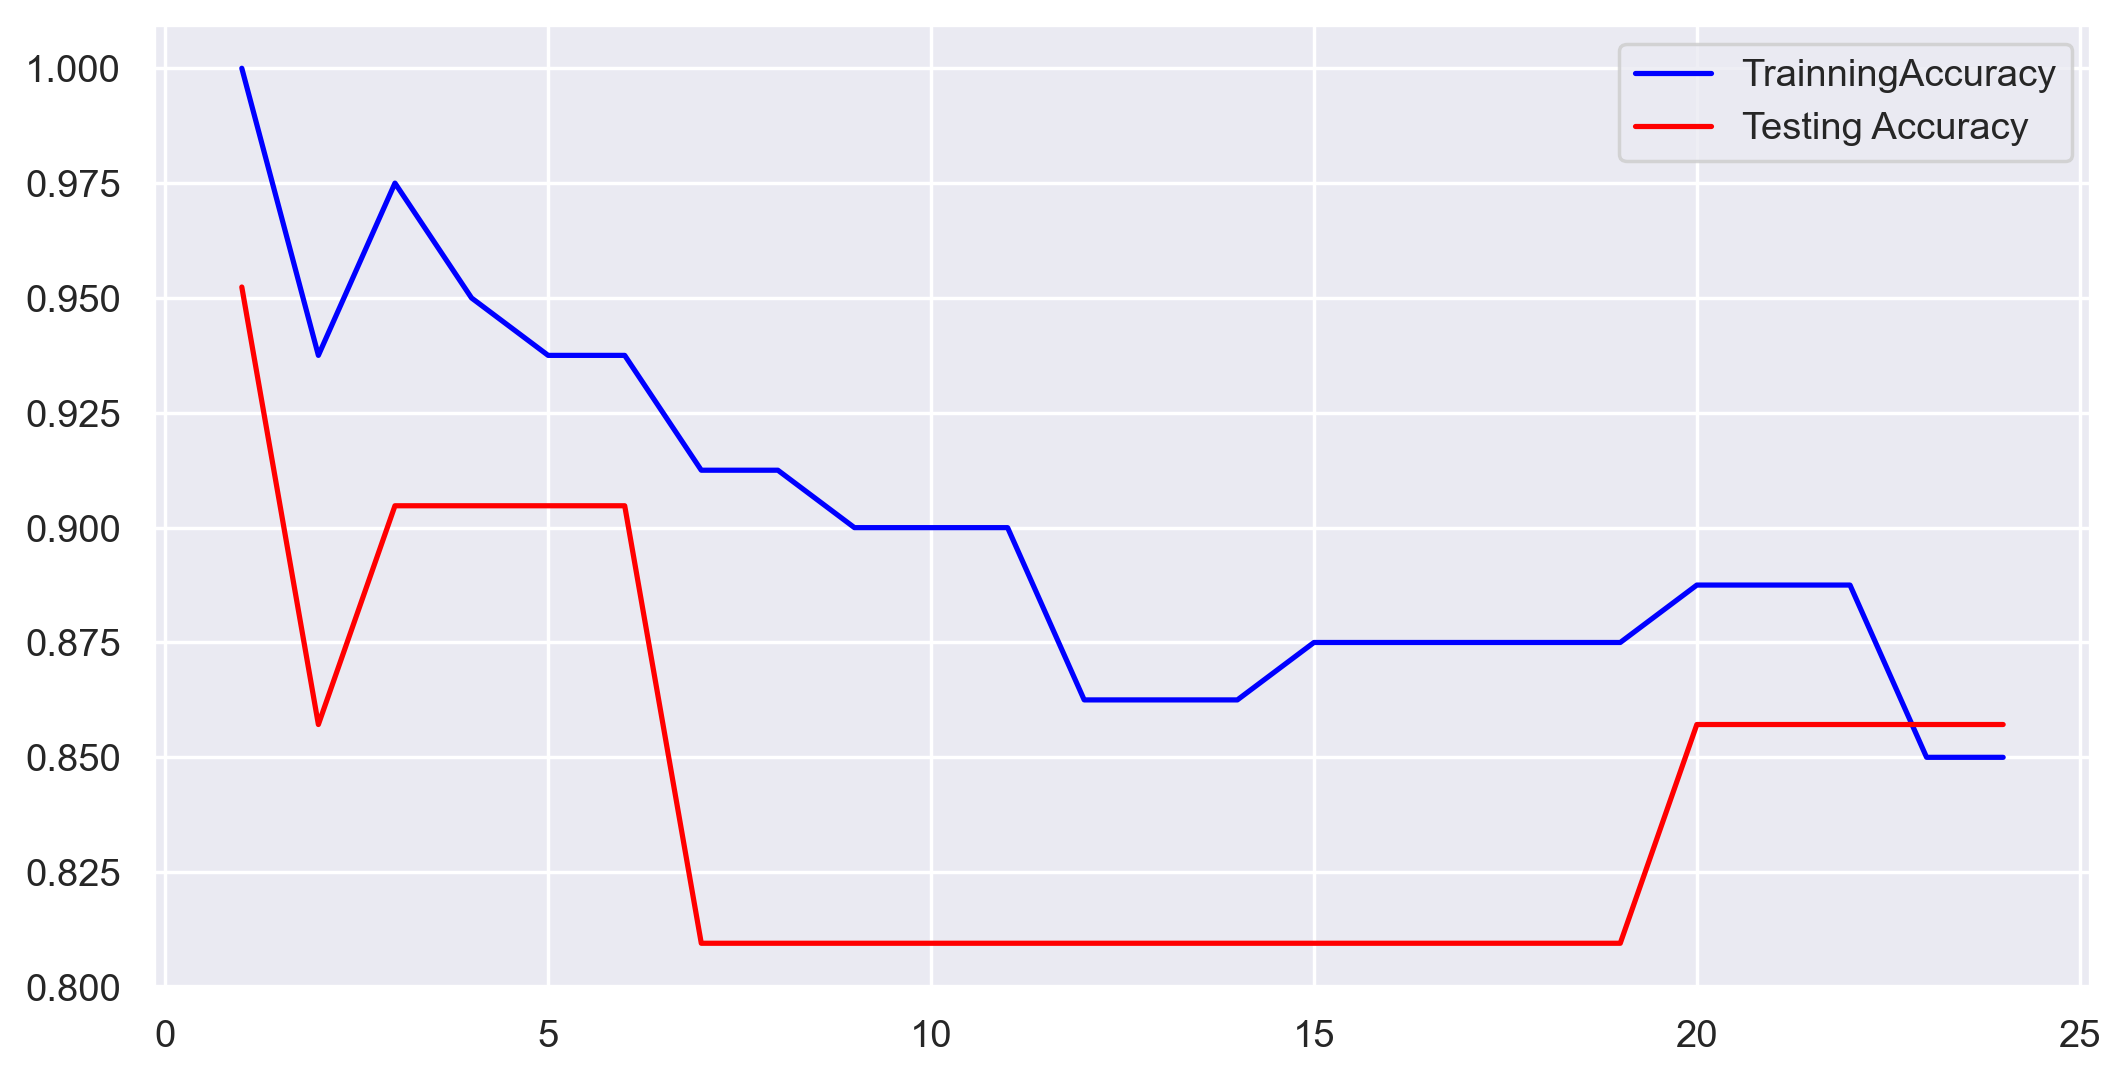

In [43]:
plt.plot(range(1,25),train_acc,linestyle='-',color='blue',label='TrainningAccuracy')
plt.plot(range(1,25),test_acc,linestyle='-',color='red',label='Testing Accuracy')
plt.legend()

# Final Model

In [44]:
# Select k=6

In [49]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 6, 3, 2],
      dtype=int64)

In [50]:
knn.score(xtrain,ytrain) , knn.score(xtest,ytest)

(0.9375, 0.9047619047619048)